In [1]:
from rmgpy.species import Species
from rmgpy.molecule.parser import *
from rmgpy.molecule.generator import *
from rmgpy.molecule.inchi import compose_aug_inchi, P_LAYER_PREFIX, P_LAYER_SEPARATOR, U_LAYER_PREFIX, U_LAYER_SEPARATOR
from rmgpy.molecule import Molecule, Atom, Bond
from rmgpy.molecule.resonance import *
from IPython.display import display, HTML, Image, display_html
import re
import itertools
from operator import itemgetter
from rmgpy.molecule.element import PeriodicSystem

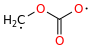

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p2 c0 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



In [2]:
adj = """
multiplicity 3
1 C u1 p0 c0 {5,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u1 p2 c0 {2,S}
4 O u0 p2 c0 {2,D}
5 O u0 p2 c0 {1,S} {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}
"""

mol = Molecule().fromAdjacencyList(adj)

display(mol)
print mol.toAdjacencyList()

1


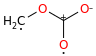

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



In [3]:
isomers = generateLonePairMultipleBondResonanceStructures(mol)
print len(isomers)
for struc in isomers:
    display(struc)
    print struc.toAdjacencyList()

In [4]:
isomers = generateLonePairRadicalResonanceStructures(mol)
print len(isomers)
for struc in isomers:
    display(struc)
    print struc.toAdjacencyList()

0


1


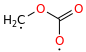

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p2 c0 {2,D}
5 O u1 p2 c0 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



In [5]:
isomers = generateAdjacentResonanceStructures(mol)
print len(isomers)
for struc in isomers:
    display(struc)
    print struc.toAdjacencyList()

In [4]:
features = analyzeMolecule(mol)
features

{'hasLonePairs': True,
 'isAromatic': False,
 'isArylRadical': False,
 'isCyclic': False,
 'isPolycyclicAromatic': False,
 'isRadical': True}

In [5]:
methodList = populateResonanceAlgorithms(features)
methodList

[<cyfunction generateAdjacentResonanceStructures at 0x7f73b6866590>,
 <cyfunction generateLonePairRadicalResonanceStructures at 0x7f73b6866650>,
 <cyfunction generateLonePairMultipleBondResonanceStructures at 0x7f73b6866710>]

In [6]:
molList = [mol]
keepIsomorphic = False

index = 0
while index < len(molList) and index < 1000:
    molecule = molList[index]
    newMolList = []

    for method in methodList:
        newMolList.extend(method(molecule))

    for newMol in newMolList:
        # Append to isomer list if unique
        for mol in molList:
            if not keepIsomorphic and mol.isIsomorphic(newMol):
                break
            elif keepIsomorphic and mol.isIdentical(newMol):
                break
        else:
            molList.append(newMol)

    # Move to next resonance isomer
    index += 1
    
print molList

[Molecule(SMILES="[CH2]OC([O])=O"), Molecule(SMILES="[CH2]OC([O])O"), Molecule(SMILES="[CH2]O=C([O])O"), Molecule(SMILES="C=O[C]([O])O"), Molecule(SMILES="[CH2][O]C(=O)O"), Molecule(SMILES="CO[C]([O])O"), Molecule(SMILES="C=OC([O])=[O]"), Molecule(SMILES="[CH2][O]C(O)O"), Molecule(SMILES="COC([O])=[O]"), Molecule(SMILES="C=OC([O])=O"), Molecule(SMILES="COC([O])=O"), Molecule(SMILES="C=O[C](O)O"), Molecule(SMILES="CO[C](O)O"), Molecule(SMILES="C=O[C](=[O])O"), Molecule(SMILES="C=O[C](O)O"), Molecule(SMILES="CO=C([O])O"), Molecule(SMILES="CO[C](=[O])O"), Molecule(SMILES="[CH2]O=C(=[O])O"), Molecule(SMILES="C=OC(=[O])=[O]"), Molecule(SMILES="CO[C](O)O"), Molecule(SMILES="C[O]C(=[O])O"), Molecule(SMILES="COC(=[O])=[O]"), Molecule(SMILES="[CH2][O]C(#O)O"), Molecule(SMILES="[CH2]OC(=[O])O"), Molecule(SMILES="[CH2]O=[C](O)O"), Molecule(SMILES="C=OC([O])#O"), Molecule(SMILES="C=OC([O])#O"), Molecule(SMILES="C=O[C](=[O])O"), Molecule(SMILES="C=O[C](O)O"), Molecule(SMILES="C[O][C](O)O"), Molecul

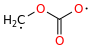

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p2 c0 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



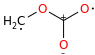

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



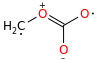

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,D} {4,S} {5,S}
3 O u0 p1 c+1 {1,S} {2,D}
4 O u1 p2 c0 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



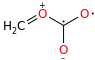

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u1 p0 c0 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



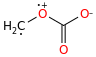

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p2 c0 {2,D}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



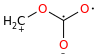

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u1 p0 c0 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



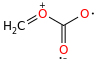

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u1 p2 c0 {2,S}
5 O u1 p2 c-1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



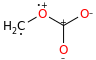

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



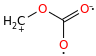

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c0 {2,S}
5 O u1 p2 c-1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



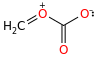

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p2 c0 {2,D}
5 O u2 p2 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



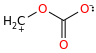

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p2 c0 {2,D}
5 O u2 p2 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



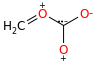

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



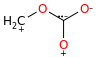

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



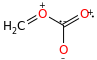

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u1 p0 c-1 {3,S} {4,S} {5,D}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



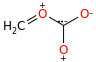

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



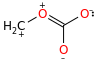

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,D} {4,S} {5,S}
3 O u0 p1 c+1 {1,S} {2,D}
4 O u0 p3 c-1 {2,S}
5 O u2 p2 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



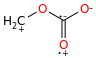

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u1 p0 c-1 {3,S} {4,S} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



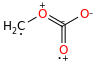

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,D} {4,S} {5,D}
3 O u0 p1 c+1 {1,S} {2,D}
4 O u0 p3 c-1 {2,S}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



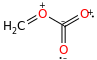

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,D} {5,D}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u1 p2 c-1 {2,D}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



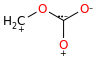

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



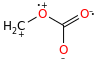

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u1 p2 c-1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



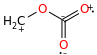

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,D} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c-1 {2,D}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



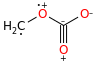

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,S} {5,T}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p1 c+1 {2,T}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



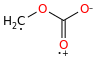

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



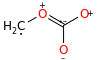

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u1 p0 c-1 {3,D} {4,S} {5,S}
3 O u0 p1 c+1 {1,S} {2,D}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



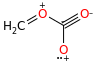

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,T} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p2 c-1 {2,T}
5 O u2 p1 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



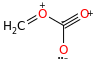

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,S} {5,T}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u2 p2 c-1 {2,S}
5 O u0 p1 c+1 {2,T}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



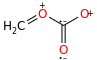

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u1 p0 c-1 {3,S} {4,D} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u1 p2 c-1 {2,D}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



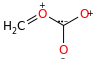

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



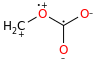

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u1 p0 c0 {3,S} {4,S} {5,S}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p3 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



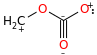

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,T} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p2 c-1 {2,T}
5 O u2 p1 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



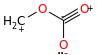

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,S} {5,T}
3 O u0 p2 c0 {1,S} {2,S}
4 O u2 p2 c-1 {2,S}
5 O u0 p1 c+1 {2,T}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



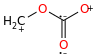

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u1 p0 c-1 {3,S} {4,D} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c-1 {2,D}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



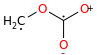

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u1 p0 c0 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



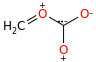

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



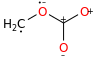

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u1 p2 c-1 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



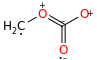

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,D} {4,D} {5,S}
3 O u0 p1 c+1 {1,S} {2,D}
4 O u1 p2 c-1 {2,D}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



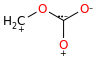

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



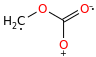

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u1 p2 c-1 {2,D}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



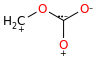

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



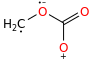

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u1 p2 c-1 {1,S} {2,S}
4 O u0 p2 c0 {2,D}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



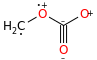

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c-1 {3,S} {4,T} {5,S}
3 O u1 p1 c+1 {1,S} {2,S}
4 O u0 p2 c-1 {2,T}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



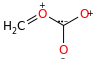

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



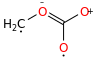

multiplicity 3
1 C u1 p0 c0 {3,S} {6,S} {7,S}
2 C u0 p0 c0 {3,D} {4,S} {5,S}
3 O u0 p2 c-1 {1,S} {2,D}
4 O u1 p2 c0 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



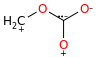

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



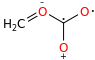

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u1 p0 c0 {3,S} {4,S} {5,S}
3 O u0 p2 c-1 {1,D} {2,S}
4 O u1 p2 c0 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



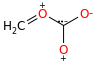

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



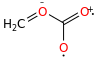

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,S} {5,D}
3 O u0 p2 c-1 {1,D} {2,S}
4 O u1 p2 c0 {2,S}
5 O u1 p1 c+1 {2,D}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



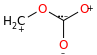

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



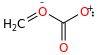

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c0 {3,S} {4,D} {5,S}
3 O u0 p2 c-1 {1,D} {2,S}
4 O u0 p2 c0 {2,D}
5 O u2 p1 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



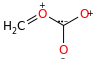

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



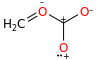

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u0 p2 c-1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u2 p1 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



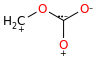

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



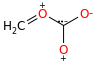

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



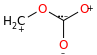

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



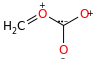

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



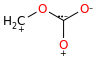

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



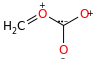

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



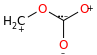

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



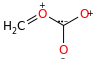

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



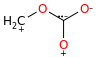

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



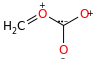

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



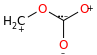

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



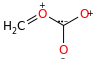

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



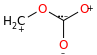

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



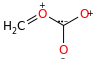

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



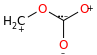

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



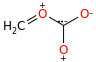

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



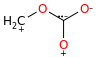

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



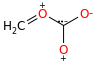

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



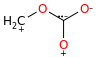

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



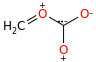

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



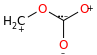

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



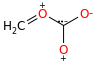

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



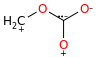

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



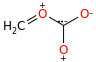

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



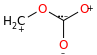

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



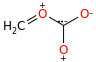

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



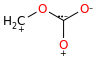

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



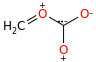

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



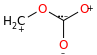

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



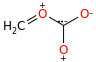

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



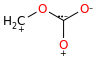

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



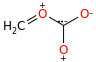

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



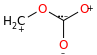

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



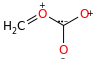

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



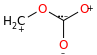

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



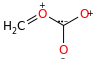

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



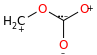

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



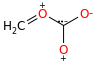

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



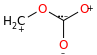

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



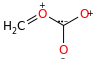

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



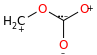

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



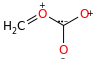

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



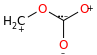

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



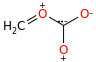

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



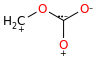

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



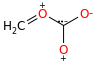

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



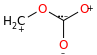

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



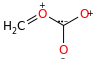

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



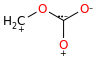

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



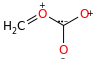

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



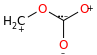

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



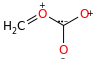

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



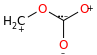

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



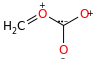

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



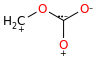

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



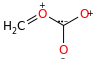

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



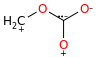

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



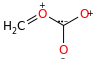

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



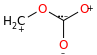

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



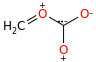

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



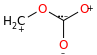

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



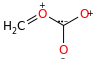

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



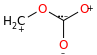

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



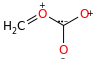

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



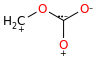

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



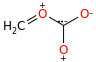

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



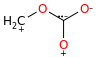

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



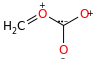

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



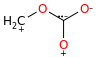

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



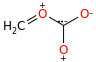

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



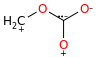

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



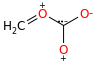

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



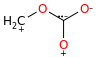

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



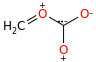

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



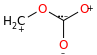

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



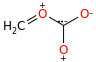

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



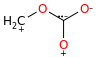

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



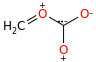

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



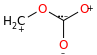

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



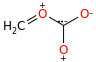

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



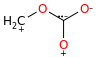

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



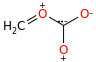

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



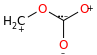

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



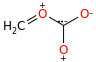

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



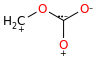

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



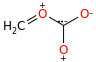

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



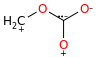

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



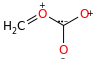

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



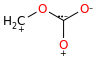

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



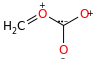

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



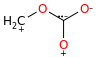

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



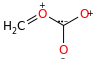

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



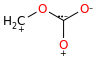

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



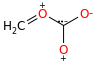

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



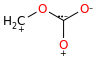

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



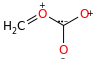

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



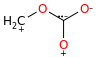

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



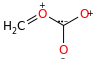

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



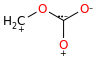

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



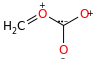

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



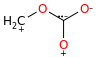

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



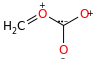

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



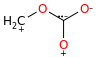

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



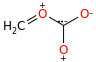

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



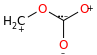

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



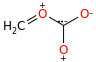

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



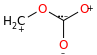

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



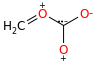

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



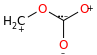

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



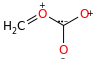

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



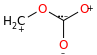

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



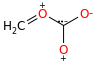

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



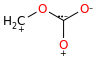

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



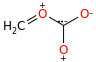

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



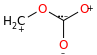

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



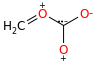

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



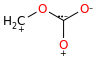

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



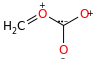

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



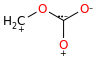

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



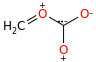

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



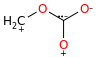

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



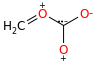

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



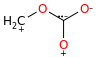

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



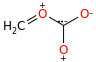

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



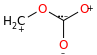

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



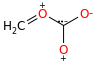

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



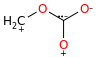

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



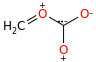

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



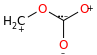

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



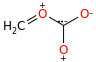

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



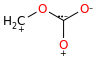

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



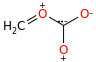

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



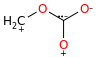

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



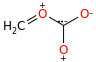

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



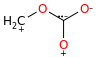

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



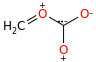

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



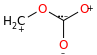

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



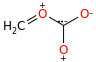

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



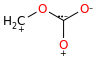

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



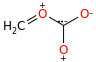

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



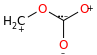

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



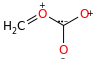

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



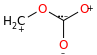

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



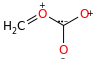

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



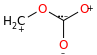

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



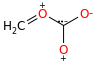

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



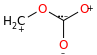

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



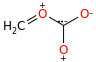

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



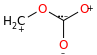

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



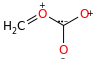

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



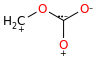

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



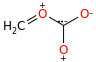

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



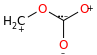

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



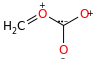

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



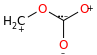

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



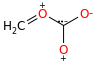

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



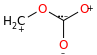

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



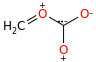

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



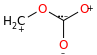

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



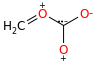

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



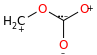

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



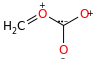

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



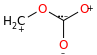

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



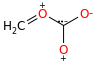

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



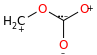

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



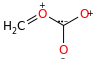

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



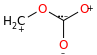

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



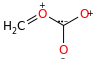

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



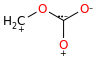

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



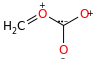

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



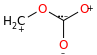

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



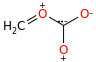

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



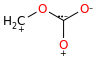

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



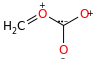

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



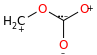

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



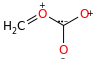

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



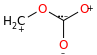

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



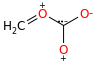

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



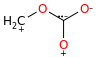

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



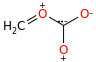

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



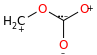

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



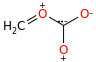

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



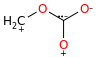

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



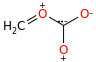

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



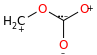

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



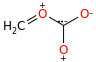

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



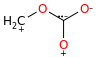

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



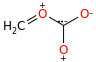

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



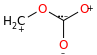

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



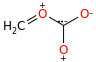

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



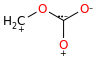

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



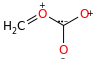

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



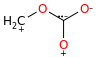

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



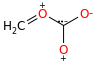

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



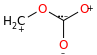

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



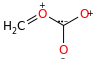

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



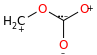

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



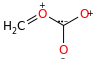

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



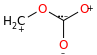

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



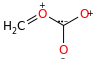

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



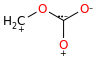

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



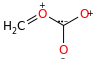

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



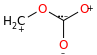

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



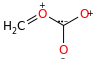

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



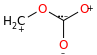

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



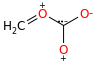

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



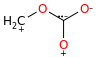

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



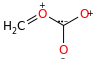

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



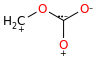

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



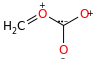

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



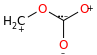

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



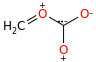

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



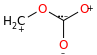

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



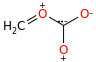

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



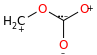

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



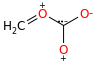

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



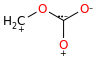

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



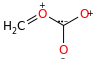

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



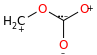

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



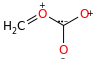

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



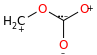

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



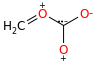

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



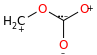

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



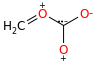

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



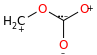

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



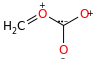

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



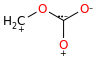

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



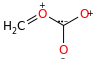

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



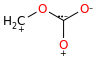

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



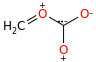

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



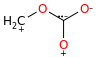

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



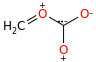

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



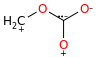

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



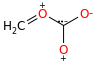

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



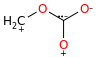

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



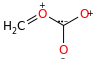

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



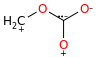

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



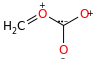

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



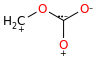

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



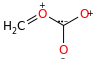

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



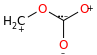

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



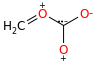

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



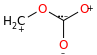

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



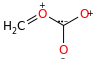

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



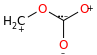

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



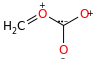

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



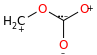

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



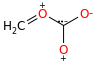

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



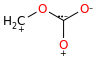

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



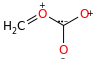

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



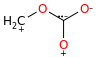

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



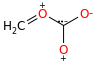

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



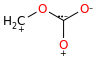

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



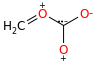

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



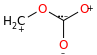

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



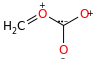

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



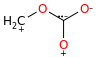

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



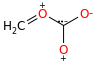

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



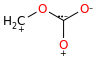

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



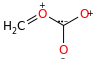

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



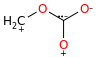

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



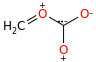

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



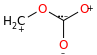

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



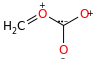

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



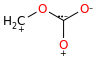

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



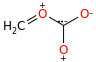

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



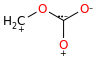

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



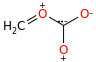

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



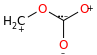

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



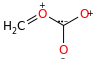

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



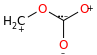

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



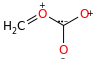

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



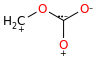

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



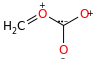

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



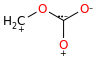

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



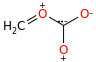

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



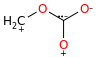

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



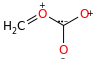

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



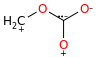

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



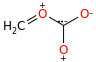

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



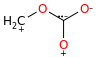

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



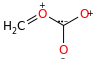

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



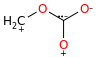

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



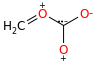

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



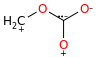

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



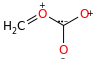

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



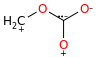

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



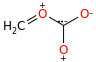

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



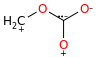

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



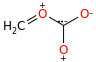

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



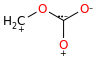

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



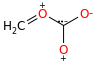

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



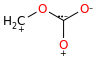

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



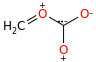

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



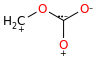

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



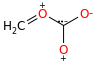

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



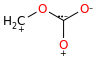

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



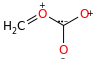

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



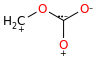

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



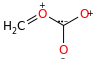

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



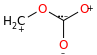

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



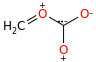

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



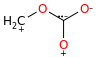

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



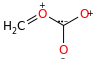

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



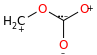

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



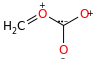

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



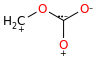

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



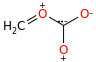

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



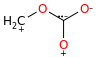

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



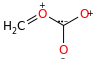

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



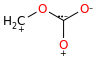

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



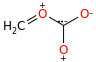

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



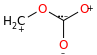

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



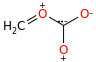

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



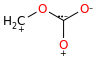

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



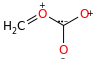

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



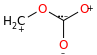

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



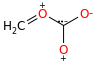

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



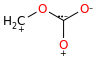

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



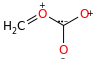

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



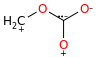

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



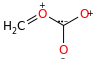

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



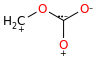

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



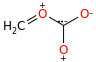

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



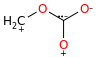

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



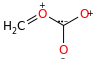

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



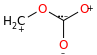

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



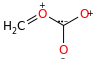

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



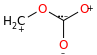

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



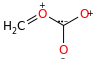

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



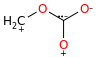

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



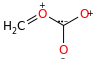

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



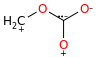

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



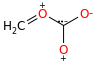

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



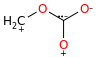

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



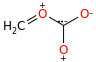

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



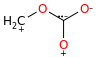

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



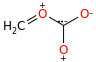

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



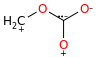

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



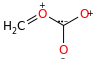

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



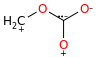

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



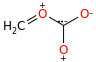

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



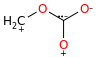

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



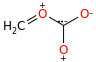

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



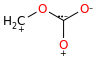

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



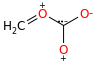

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



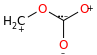

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



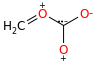

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



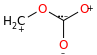

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



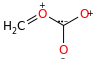

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



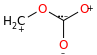

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



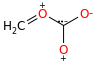

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



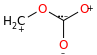

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



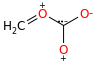

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



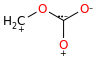

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



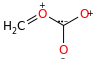

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



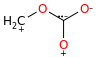

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



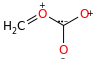

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



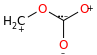

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



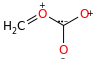

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



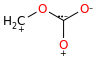

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



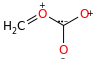

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



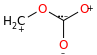

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



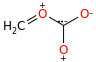

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



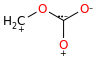

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



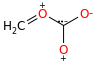

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



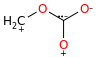

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



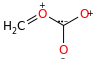

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



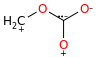

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



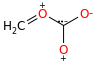

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



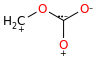

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



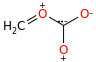

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



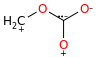

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



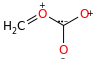

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



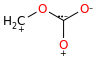

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



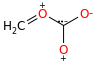

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



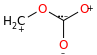

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



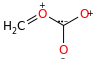

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



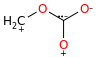

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



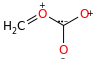

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



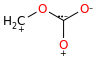

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



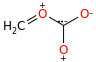

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



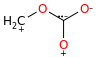

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



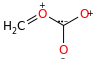

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



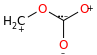

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



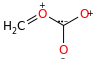

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



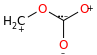

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



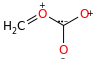

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



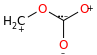

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



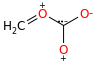

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



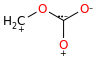

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



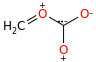

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



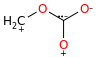

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



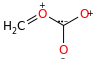

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



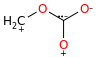

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



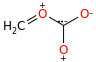

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



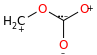

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



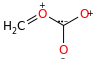

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



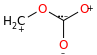

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



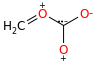

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



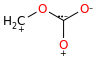

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



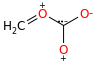

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



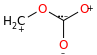

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



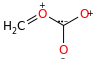

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



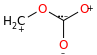

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



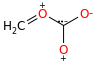

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



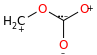

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



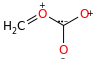

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



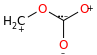

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



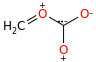

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



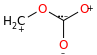

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



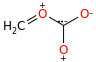

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



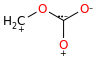

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



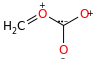

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



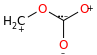

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



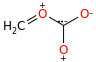

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



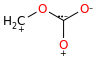

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



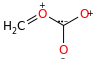

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



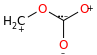

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



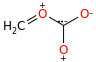

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



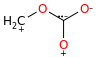

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



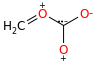

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



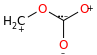

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



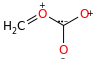

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



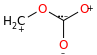

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



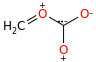

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



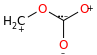

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



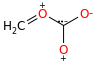

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



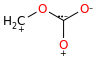

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



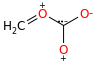

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



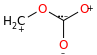

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



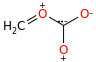

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



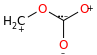

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



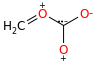

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



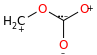

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



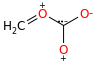

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



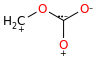

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



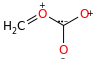

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



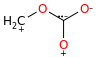

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



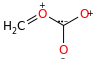

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



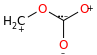

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



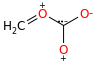

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



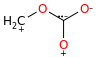

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



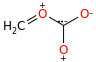

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



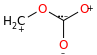

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



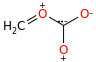

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



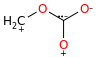

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



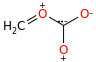

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



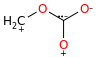

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



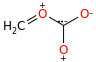

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



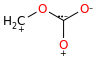

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



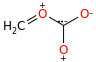

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



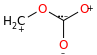

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



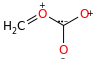

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



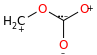

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



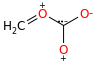

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



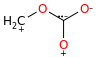

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



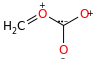

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



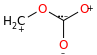

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



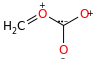

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



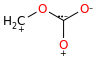

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



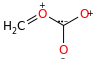

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



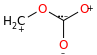

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



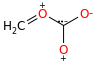

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



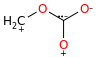

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



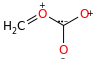

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



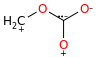

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



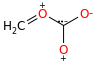

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



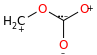

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



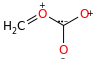

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



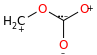

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



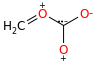

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



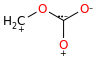

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



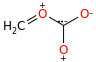

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



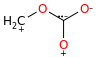

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



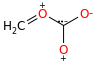

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



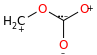

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



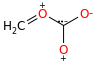

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



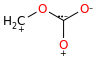

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



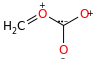

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



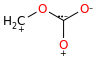

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



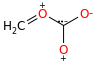

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



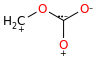

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



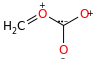

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



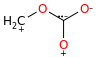

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



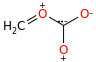

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



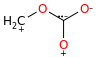

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



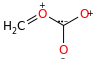

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



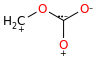

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



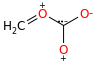

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



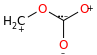

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



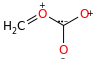

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



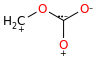

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



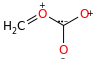

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



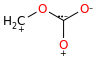

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



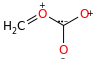

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



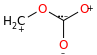

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



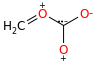

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



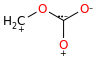

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



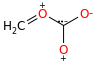

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



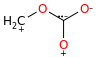

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



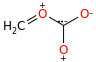

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



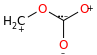

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



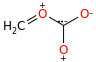

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



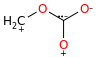

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



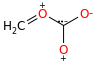

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



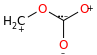

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



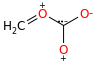

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



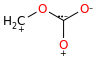

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



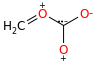

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



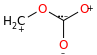

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



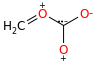

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



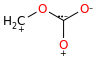

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



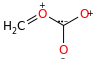

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



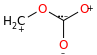

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



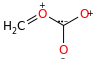

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



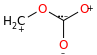

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



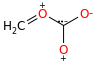

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



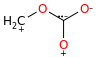

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



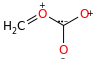

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



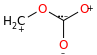

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



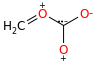

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



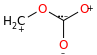

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



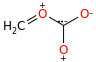

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



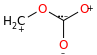

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



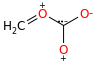

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



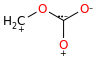

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



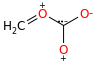

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



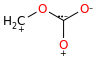

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



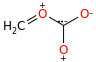

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



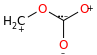

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



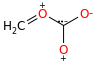

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



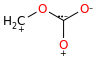

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



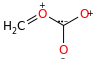

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



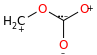

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



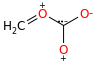

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



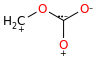

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



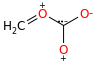

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



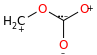

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



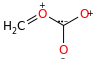

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



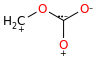

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



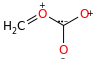

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



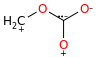

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



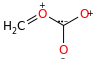

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



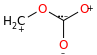

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



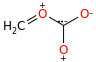

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



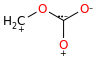

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



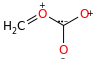

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



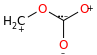

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



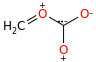

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



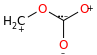

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



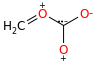

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



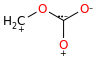

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



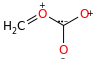

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



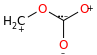

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



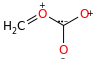

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



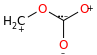

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



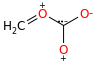

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



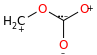

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



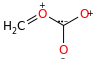

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



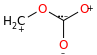

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



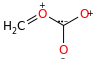

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



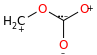

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



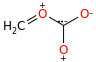

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



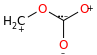

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



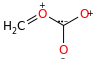

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



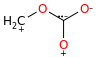

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



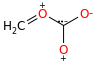

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



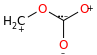

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



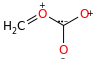

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



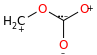

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



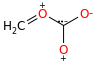

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



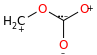

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



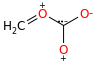

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



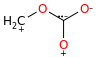

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



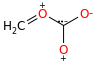

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



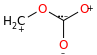

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



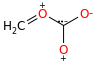

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



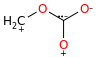

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



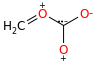

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



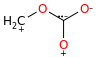

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



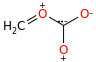

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



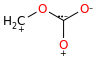

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



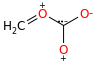

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



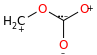

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



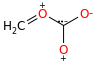

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



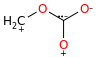

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



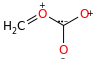

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



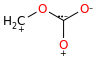

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



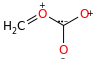

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



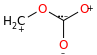

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



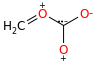

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



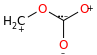

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



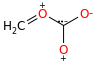

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



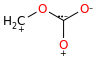

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



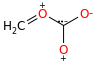

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



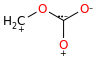

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



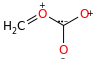

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



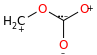

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



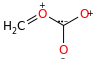

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



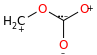

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



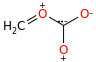

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



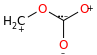

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



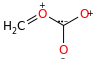

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



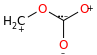

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



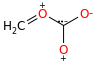

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



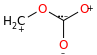

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



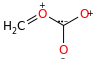

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



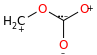

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



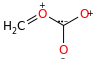

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



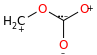

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



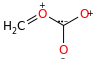

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



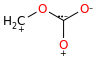

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



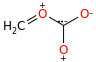

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



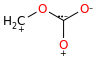

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



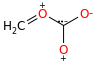

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



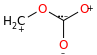

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



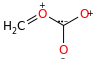

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



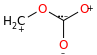

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



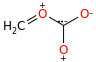

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



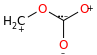

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



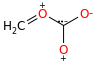

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



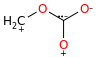

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



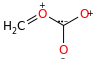

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



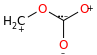

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



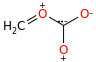

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



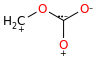

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



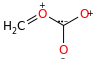

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



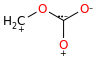

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



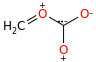

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



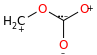

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



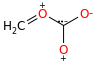

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



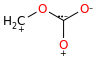

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



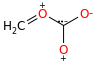

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



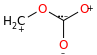

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



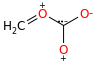

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



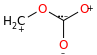

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



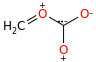

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



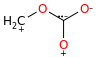

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



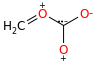

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



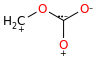

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



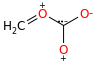

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



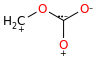

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



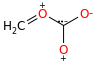

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



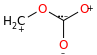

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



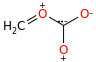

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



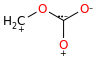

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



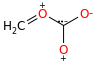

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



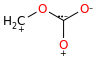

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



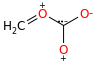

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



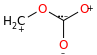

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



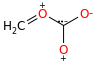

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



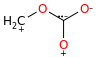

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



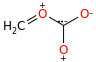

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



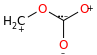

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



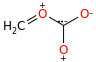

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



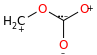

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



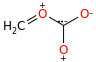

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



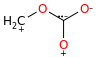

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



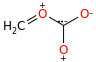

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



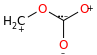

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



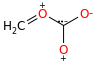

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



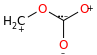

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



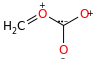

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



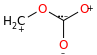

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



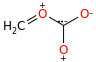

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



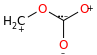

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



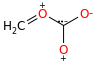

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



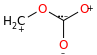

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



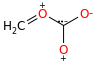

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



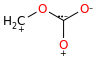

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



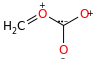

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



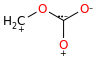

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



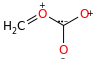

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



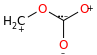

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



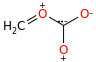

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



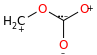

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



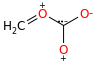

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



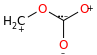

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



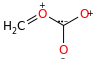

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



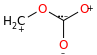

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



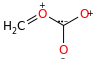

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



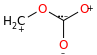

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



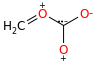

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



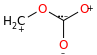

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



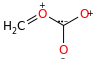

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



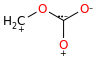

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



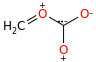

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



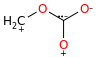

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



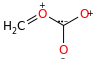

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



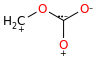

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



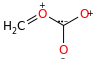

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



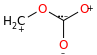

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



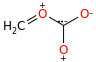

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



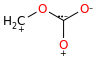

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



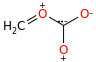

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



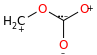

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



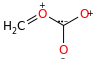

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



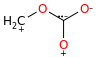

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



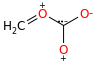

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



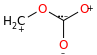

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



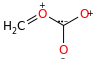

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



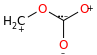

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



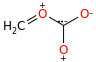

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



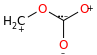

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



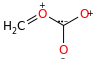

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



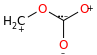

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



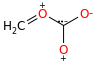

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



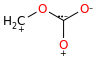

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



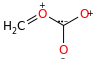

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



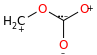

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



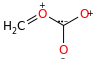

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



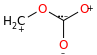

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



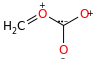

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



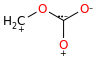

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



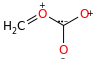

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



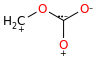

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



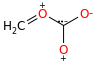

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



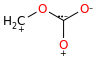

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



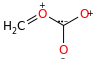

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



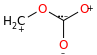

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



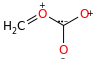

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



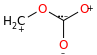

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



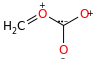

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



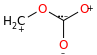

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



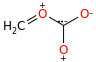

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



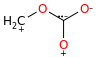

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



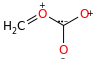

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



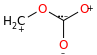

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



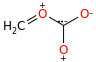

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



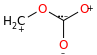

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



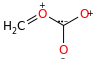

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



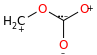

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



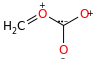

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



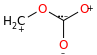

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



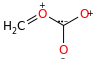

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



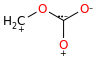

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



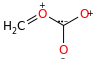

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



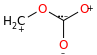

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



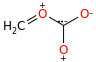

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



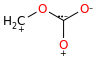

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



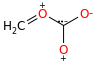

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



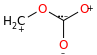

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



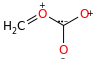

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



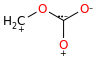

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



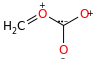

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



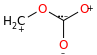

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



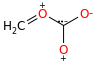

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



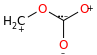

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



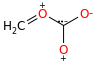

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



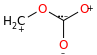

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



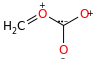

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



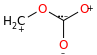

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



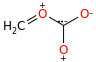

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



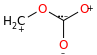

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



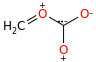

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



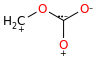

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



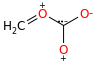

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



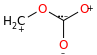

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



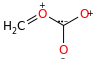

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



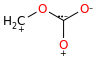

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



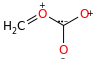

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



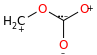

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



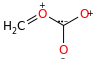

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



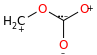

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



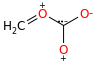

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



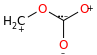

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



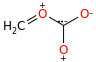

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



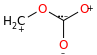

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



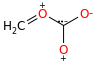

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



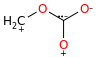

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



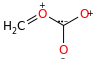

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



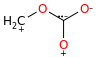

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



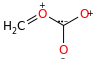

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



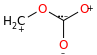

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



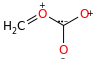

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



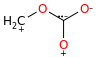

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



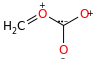

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



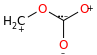

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



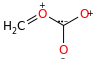

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



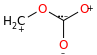

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



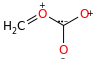

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



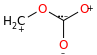

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



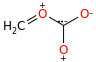

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



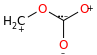

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



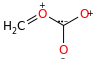

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



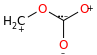

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



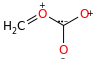

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



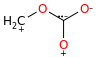

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



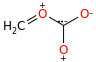

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



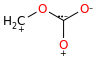

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



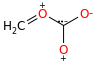

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



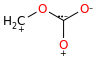

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



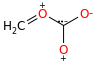

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



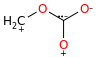

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



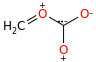

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



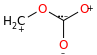

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



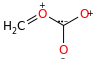

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



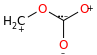

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



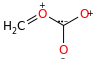

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



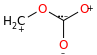

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



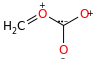

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



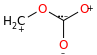

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



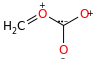

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



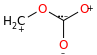

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



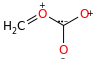

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



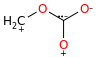

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



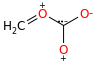

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



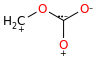

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



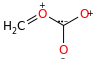

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



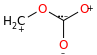

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



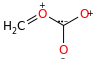

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



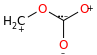

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



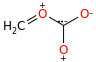

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



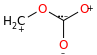

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



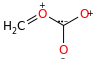

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



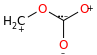

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



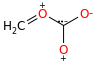

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



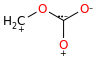

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



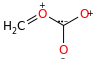

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



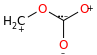

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



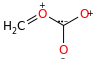

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



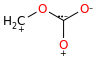

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



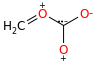

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



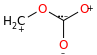

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



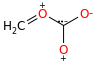

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



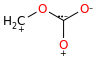

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



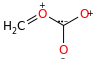

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



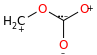

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



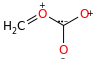

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



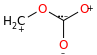

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



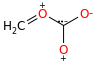

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



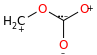

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



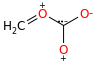

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



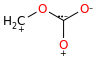

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



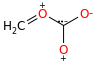

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



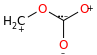

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



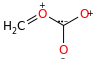

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



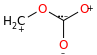

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



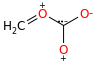

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



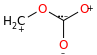

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



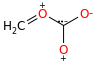

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



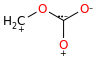

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



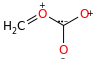

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



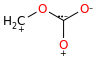

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



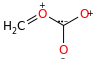

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



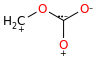

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



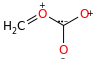

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



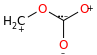

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



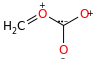

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



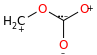

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



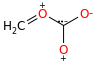

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



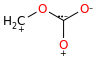

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



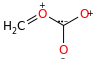

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



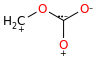

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



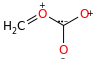

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



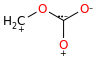

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



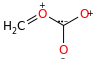

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



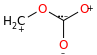

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



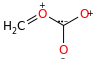

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



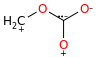

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



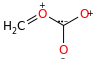

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



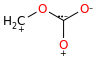

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



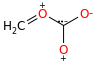

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



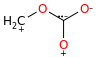

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



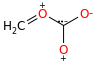

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



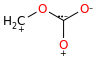

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



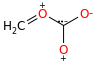

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



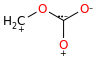

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



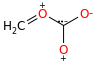

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



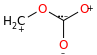

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



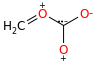

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



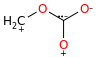

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



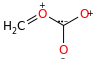

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



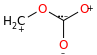

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



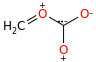

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



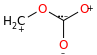

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



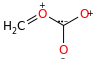

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



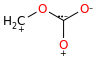

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



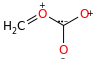

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



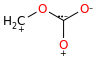

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



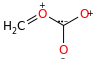

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



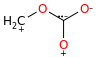

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



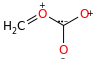

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



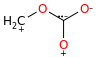

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



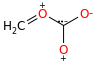

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



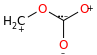

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



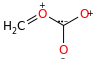

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



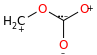

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



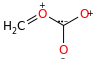

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



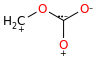

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



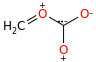

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



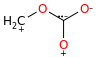

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



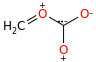

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



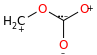

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



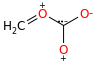

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



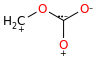

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



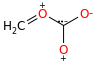

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



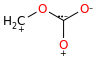

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



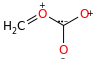

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



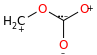

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



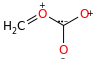

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



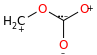

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



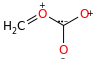

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



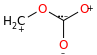

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



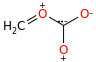

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



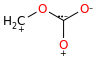

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



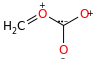

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



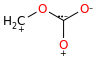

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



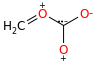

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



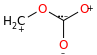

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



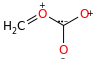

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



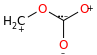

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



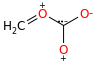

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



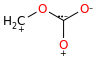

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



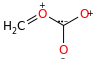

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



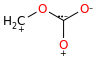

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



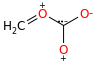

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



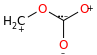

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



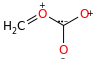

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



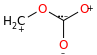

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



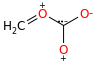

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



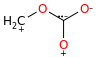

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



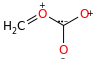

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



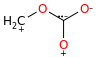

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



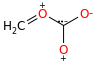

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



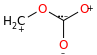

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



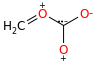

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



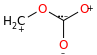

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



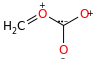

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



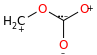

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



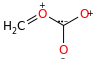

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



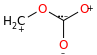

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



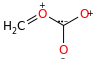

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



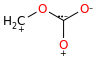

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



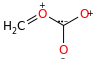

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



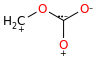

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



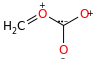

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



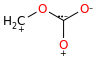

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



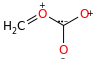

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



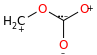

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



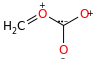

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



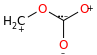

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



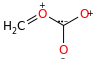

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



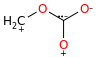

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



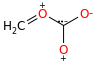

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



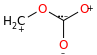

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



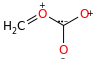

multiplicity 3
1 C u0 p0 c0 {3,D} {6,S} {7,S}
2 C u2 p0 c-1 {3,S} {4,S} {5,S}
3 O u0 p1 c+1 {1,D} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u0 p2 c+1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



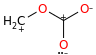

multiplicity 3
1 C u0 p0 c+1 {3,S} {6,S} {7,S}
2 C u0 p0 c+1 {3,S} {4,S} {5,S}
3 O u0 p2 c0 {1,S} {2,S}
4 O u0 p3 c-1 {2,S}
5 O u2 p2 c-1 {2,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}



In [7]:
for struc in molList:
    display(struc)
    print struc.toAdjacencyList()

In [11]:
len(molList)

1001

In [ ]:
res = resonance.generateResonanceStructures(mol)
print "\nmolecule has {0} resonance structures:".format(len(res))
for struc in res:
    display(struc)